# WeatherPy
----
### Observations
1.  Our initial hypothesis, that temperatures do get warmer the closer you get to the equator has been proven correct as only one city within 20 degrees to the north or south was below 40 degrees (F).  Temperatures would then decrease the further north or south you would go.<p>
    
2.  While the temperatures do increase the closer you get to the equator, it is interesting that the temperature drops more slowly the further you are from equator to the southern hemisphere as opposed to the northern hemisphere where the drop in temperature appear more drastic.  This could be due to having more cities in the sample greater than 50 degrees away.<p>
    
3.  Without added information regarding wind patterns/jet streams in the given areas, it is difficult to ascertain a definite correlation between humidity, wind speeds and temperatures.

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

<b>Dependencies and Setup</b>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

<b>Import API key</b>

In [3]:
from config import weather_api_key

<b>Incorporated citipy to determine city based on latitude and longitude</b>

In [4]:
from citipy import citipy

<b>Output File (CSV)</b>

In [5]:
output_data_file = "output_data/cities.csv"

<b>Range of latitudes and longitudes</b>

In [6]:
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

<b>List for holding lat_lngs and cities</b>

In [7]:
lat_lngs = []
cities = []

<b>Create a set of random lat and lng combinations</b>

In [8]:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

<b>Identify nearest city for each lat, lng combination<br>
If the city is unique, then add it to our cities list</b>

In [9]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

<b>Print the city count to confirm sufficient count</b>

In [10]:
len(cities)

602

In [11]:
# Getting list a cities for verification
cities

['krasnoselkup',
 'thompson',
 'albany',
 'tsihombe',
 'atuona',
 'pozo colorado',
 'new norfolk',
 'jamestown',
 'rikitea',
 'burnie',
 'attawapiskat',
 'butaritari',
 'cape town',
 'baculin',
 'qaanaaq',
 'gladstone',
 'tasiilaq',
 'alta floresta',
 'truth or consequences',
 'leningradskiy',
 'constantine',
 'kargasok',
 'ixtlan del rio',
 'lolua',
 'kamiiso',
 'mataura',
 'provideniya',
 'puerto escondido',
 'pangnirtung',
 'ketchikan',
 'kopervik',
 'praia',
 'barrow',
 'geraldton',
 'nabire',
 'chake chake',
 'ushuaia',
 'aksarka',
 'bethel',
 'bilibino',
 'upernavik',
 'kodiak',
 'mount isa',
 'narasannapeta',
 'bluff',
 'castro',
 'almaznyy',
 'sao filipe',
 'iqaluit',
 'areia branca',
 'port hardy',
 'illoqqortoormiut',
 'taolanaro',
 'puerto ayora',
 'mocuba',
 'riyadh',
 'amderma',
 'beloha',
 'busselton',
 'parintins',
 'sinnamary',
 'zhangye',
 'saldanha',
 'pyay',
 'isangel',
 'guerrero negro',
 'chokurdakh',
 'victoria',
 'svobodnyy',
 'celestun',
 'kapaa',
 'gat',
 'ande

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [12]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#query_url = f"{url}id={city}&appid={weather_api_key}&q="
#query_url

url = f'http://api.openweathermap.org/data/2.5/weather?APPID={weather_api_key}&units={units}&q='
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID"
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q='

In [13]:
# Creating lists for to append API response data
cityname = []
country = []
latitude = []
longitude = []
cloudiness = []
date = []
wind = []
humidity = []
max_temp = []

In [14]:
# Creating print header
print('Beginning Data Retrieval')
print('------------------------------')

# Setting up loop counters
setnum = 1
countnum = 0

# Creating for loop to gather criteria from the random cities
for city in cities:
    countnum = countnum + 1
    if countnum == 51:
        countnum = 1
        setnum = setnum +1
        time.sleep(15)
        
    print(f'Processing Record {countnum} of Set {setnum} | {city}')
    try:
        response = requests.get(f"{url}{city}").json() 
        cityname.append(response['name'])
        country.append(response['sys']['country'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        #print((f"{url}{city}"))
    except:
        print('City not found.  Skipping...')
        print(f"{url}{city}")
        
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | krasnoselkup
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | tsihombe
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=tsihombe
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | pozo colorado
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | burnie
Processing Record 11 of Set 1 | attawapiskat
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=attawapiskat
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | baculin
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | gladstone

Processing Record 17 of Set 4 | caravelas
Processing Record 18 of Set 4 | pochutla
Processing Record 19 of Set 4 | bratsk
Processing Record 20 of Set 4 | kyren
Processing Record 21 of Set 4 | cidreira
Processing Record 22 of Set 4 | dryden
Processing Record 23 of Set 4 | viseu
Processing Record 24 of Set 4 | ambilobe
Processing Record 25 of Set 4 | olinda
Processing Record 26 of Set 4 | bolshegrivskoye
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=bolshegrivskoye
Processing Record 27 of Set 4 | waingapu
Processing Record 28 of Set 4 | sahrak
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=sahrak
Processing Record 29 of Set 4 | vestmannaeyjar
Processing Record 30 of Set 4 | lata
Processing Record 31 of Set 4 | botad
Processing Record 32 of Set 4 | mar del plata
Processing Record 33 of Set 4 | hilo
Processing Record 34 o

Processing Record 15 of Set 7 | salitrillo
Processing Record 16 of Set 7 | kaili
Processing Record 17 of Set 7 | plettenberg bay
Processing Record 18 of Set 7 | rabo de peixe
Processing Record 19 of Set 7 | lahij
Processing Record 20 of Set 7 | vibo valentia
Processing Record 21 of Set 7 | tiksi
Processing Record 22 of Set 7 | paka
Processing Record 23 of Set 7 | serenje
Processing Record 24 of Set 7 | dyer
Processing Record 25 of Set 7 | antagan
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=antagan
Processing Record 26 of Set 7 | grand-lahou
Processing Record 27 of Set 7 | pasni
Processing Record 28 of Set 7 | lannion
Processing Record 29 of Set 7 | morro bay
Processing Record 30 of Set 7 | cayenne
Processing Record 31 of Set 7 | bonnyville
Processing Record 32 of Set 7 | muli
Processing Record 33 of Set 7 | fargo
Processing Record 34 of Set 7 | wanning
Processing Record 35 of Set 7 | katsuura
Proces

Processing Record 34 of Set 10 | sagua la grande
Processing Record 35 of Set 10 | dossor
Processing Record 36 of Set 10 | hillsboro
Processing Record 37 of Set 10 | phan rang
City not found.  Skipping...
http://api.openweathermap.org/data/2.5/weather?APPID=335521b35734fcc972cb824b513189f4&units=imperial&q=phan rang
Processing Record 38 of Set 10 | vilyuysk
Processing Record 39 of Set 10 | fukue
Processing Record 40 of Set 10 | filadelfia
Processing Record 41 of Set 10 | san quintin
Processing Record 42 of Set 10 | tiznit
Processing Record 43 of Set 10 | konstantinovka
Processing Record 44 of Set 10 | majene
Processing Record 45 of Set 10 | huangzhai
Processing Record 46 of Set 10 | segovia
Processing Record 47 of Set 10 | karpathos
Processing Record 48 of Set 10 | china
Processing Record 49 of Set 10 | boyolangu
Processing Record 50 of Set 10 | mersing
Processing Record 1 of Set 11 | scottsboro
Processing Record 2 of Set 11 | slave lake
Processing Record 3 of Set 11 | beira
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_test = {'City': cityname,'Country':country,'Latitude':latitude,
            'Longitude':longitude,'Cloudiness':cloudiness,'Date':date,
            'Wind':wind,'Humidity':humidity,'Max Temp':max_temp}

In [26]:
# Creating DataFrame from dictionary data and exporting into a .csv file
weather_city = pd.DataFrame(weather_test)
weather_city.to_csv('WeatherOutput/city_weather_main.csv', index = False)

In [27]:
# Displaying DataFrame in Describe format.
weather_city.describe()

,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
count,560.000000,560.000000,560.000000,5.600000e+02,560.000000,560.000000,560.000000
mean,20.298429,15.631143,54.644643,1.608499e+09,8.204232,74.991071,51.189518
std,33.305883,91.018895,39.921889,1.059279e+02,5.901425,19.128272,30.666796
min,-54.800000,-179.170000,0.000000,1.608498e+09,0.650000,18.000000,-50.800000
25%,-7.965000,-65.995000,9.000000,1.608499e+09,3.652500,69.000000,35.600000
50%,25.700000,17.295000,70.500000,1.608499e+09,6.810000,80.000000,60.590000
75%,47.542500,97.262500,94.000000,1.608499e+09,11.237500,88.000000,76.107500
max,78.220000,179.320000,100.000000,1.608499e+09,39.150000,100.000000,93.200000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
# Skipping - Max Humidity = 100% but not over.

<b>Get the indices of cities that have humidity over 100%.</b>

In [29]:
# Skipping - Max Humidity = 100% but not over.

<b>Make a new DataFrame equal to the city data to drop all humidity outliers by index.<br>
Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".</b>

In [30]:
# changing date & time into readable format
weather_city['Date'] = pd.to_datetime(weather_city["Date"], unit="s")
weather_city

,City,Country,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
0,Krasnosel'kup,RU,65.70,82.47,100,2020-12-20 21:12:13,4.05,92,-2.09
1,Thompson,CA,55.74,-97.86,90,2020-12-20 21:12:13,4.70,69,-9.40
2,Albany,US,42.60,-73.97,100,2020-12-20 21:11:00,1.01,73,32.00
3,Atuona,PF,-9.80,-139.03,35,2020-12-20 21:12:14,16.91,76,78.71
4,Pozo Colorado,PY,-23.49,-58.80,100,2020-12-20 21:12:14,11.52,70,81.03
...,...,...,...,...,...,...,...,...,...
555,Lorengau,PG,-2.02,147.27,77,2020-12-20 21:16:55,5.99,76,82.40
556,Limbdi,IN,22.57,71.80,0,2020-12-20 21:16:55,7.20,33,59.58
557,Tezu,IN,27.92,96.17,0,2020-12-20 21:16:55,3.74,36,58.01
558,Itamarandiba,BR,-17.86,-42.86,100,2020-12-20 21:17:10,4.23,91,71.01


In [31]:
# Gathering quartiles information for calculations
quartiles = weather_city['Humidity'].quantile([.25,.5,.75])
quartiles

0.25    69.0
0.50    80.0
0.75    88.0
Name: Humidity, dtype: float64

In [32]:
# Additional calculations for IQR and standard deviation.
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
hum_std = weather_city['Humidity'].std()

print(f"The lower quartile of Humidity is: {lowerq}")
print(f"The upper quartile of Humidity is: {upperq}")
print(f"The interquartile range of Humidity is: {iqr}")
print(f"The the median of Humidity is: {quartiles[0.5]}")
print(f'The standard diviation of Humidity is: {hum_std}')

The lower quartile of Humidity is: 69.0
The upper quartile of Humidity is: 88.0
The interquartile range of Humidity is: 19.0
The the median of Humidity is: 80.0
The standard diviation of Humidity is: 19.128272182904986


In [33]:
#Calculating possible outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 40.5 could be outliers.
Values above 116.5 could be outliers.


In [34]:
weather_hum = weather_city['Humidity']

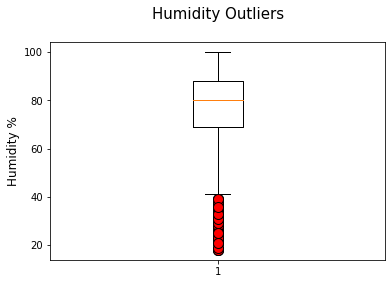

This chart shows all of the Humidity outliers


In [38]:
#Creating box & whisker plot to display outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Humidity Outliers\n', fontsize = 15)
#labels = (['Humidity'])
ax1.set_ylabel('Humidity %', fontsize = 12)
flierprops = dict(markerfacecolor='r', markersize=10)
ax1.boxplot(weather_hum, flierprops=flierprops)
plt.savefig('images/humiditybox')
plt.show()
print('This chart shows all of the Humidity outliers')

In [39]:
#Indentifying cities that are outliers
hum_outlier=weather_city.loc[weather_city['Humidity'] < 31.125,:]
hum_outlier

,City,Country,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
16,Truth or Consequences,US,33.13,-107.25,1,2020-12-20 21:12:16,5.82,25,57.00
20,Ixtlán del Río,MX,21.03,-104.37,1,2020-12-20 21:12:17,3.60,26,84.00
59,Guerrero Negro,MX,27.98,-114.06,100,2020-12-20 21:12:38,7.45,21,72.81
151,Saint George,US,37.10,-113.58,1,2020-12-20 21:13:24,5.82,29,48.20
172,Lompoc,US,34.64,-120.46,1,2020-12-20 21:13:28,3.36,22,75.00
174,San Rafael,AR,-34.62,-68.33,0,2020-12-20 21:13:26,9.64,25,77.23
188,Santa Fe,AR,-31.63,-60.70,0,2020-12-20 21:11:56,3.00,26,82.99
197,Gouré,NE,13.98,10.27,0,2020-12-20 21:13:48,4.00,21,73.99
282,Umm Kaddadah,SD,13.60,26.69,0,2020-12-20 21:14:33,13.38,27,66.25
290,Salitrillo,MX,19.43,-99.85,75,2020-12-20 21:14:35,5.82,28,68.00


In [40]:
#Creating new dataframe without outliers
clean_city_df = weather_city[weather_city['Humidity'] > 31.25]
clean_city_df

,City,Country,Latitude,Longitude,Cloudiness,Date,Wind,Humidity,Max Temp
0,Krasnosel'kup,RU,65.70,82.47,100,2020-12-20 21:12:13,4.05,92,-2.09
1,Thompson,CA,55.74,-97.86,90,2020-12-20 21:12:13,4.70,69,-9.40
2,Albany,US,42.60,-73.97,100,2020-12-20 21:11:00,1.01,73,32.00
3,Atuona,PF,-9.80,-139.03,35,2020-12-20 21:12:14,16.91,76,78.71
4,Pozo Colorado,PY,-23.49,-58.80,100,2020-12-20 21:12:14,11.52,70,81.03
...,...,...,...,...,...,...,...,...,...
555,Lorengau,PG,-2.02,147.27,77,2020-12-20 21:16:55,5.99,76,82.40
556,Limbdi,IN,22.57,71.80,0,2020-12-20 21:16:55,7.20,33,59.58
557,Tezu,IN,27.92,96.17,0,2020-12-20 21:16:55,3.74,36,58.01
558,Itamarandiba,BR,-17.86,-42.86,100,2020-12-20 21:17:10,4.23,91,71.01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [44]:
# Setting date parameter
date = time.strftime('%m/%d/%y')
date

'12/20/20'

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show>

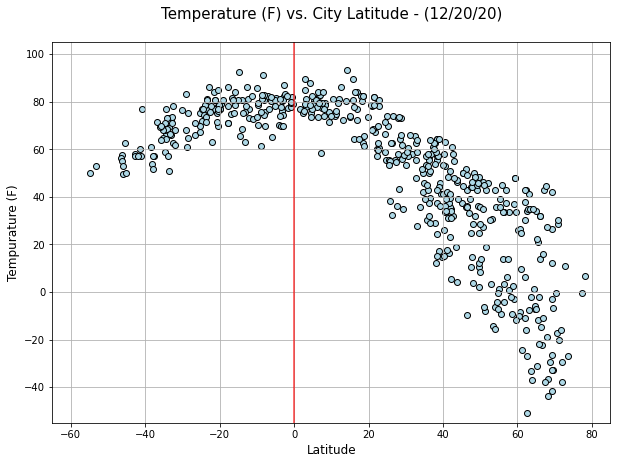

In [49]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Max Temp']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title(f'Temperature (F) vs. City Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Tempurature (F)', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(-55,105)
plt.vlines(0,-55,160, alpha=0.75, color='red')
plt.grid()
plt.savefig('images/latvstemp')
plt.show

The plot shows how the temperature drops the farther we go from the equator')

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show>

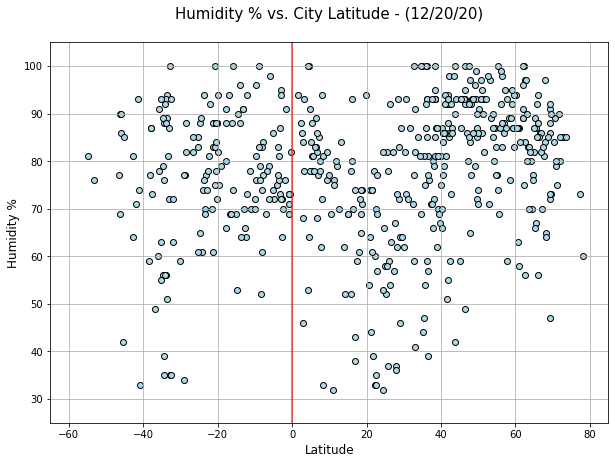

In [51]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Humidity']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title(f'Humidity % vs. City Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity %', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(25,105)
plt.vlines(0,25,105, alpha=0.75, color='red')
plt.grid()
plt.savefig('images/latvshumid')
plt.show

This scatter plot shows fairly equal distribution both close and farther away from the equator.  No significant correlation can be seen.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show>

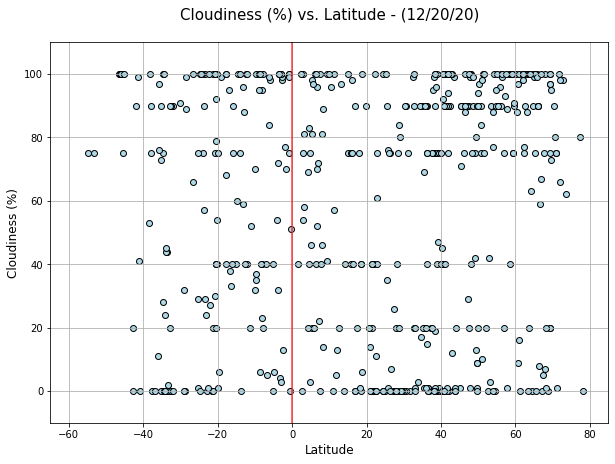

In [52]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Cloudiness']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title(f'Cloudiness (%) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(-10,110)
plt.vlines(0,-10,110, alpha=0.75, color='red')
plt.grid()
plt.savefig('images/latvscloud')
plt.show

This scatter plot shows that there does not seem to be a significant difference in cloudiness in relation to how close or how far to the equator the cities are.

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show>

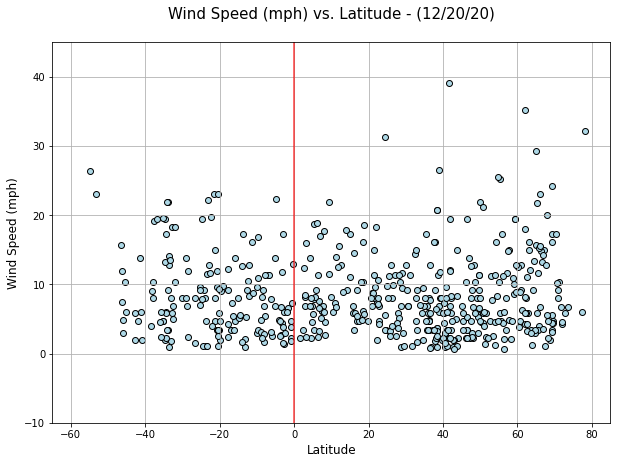

In [53]:
plt.figure(figsize=(10,7))
x_values = clean_city_df['Latitude']
y_values = clean_city_df['Wind']
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')
plt.title(f'Wind Speed (mph) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)
plt.xlim(-65,85)
plt.ylim(-10,45)
plt.vlines(0,-10,45, alpha=0.75, color='red')
plt.grid()
plt.savefig('images/latvswind')
plt.show

This scatter plot no major correlation between win speed and latitute placement.  It does appear however, that the higher wind speeds happen away from the equator.

## Linear Regression

In [54]:
# Seperating the hemispheres into north and south
north_hemi_weather_df = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
south_hemi_weather_df = clean_city_df.loc[clean_city_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7000750243344656


<function matplotlib.pyplot.show>

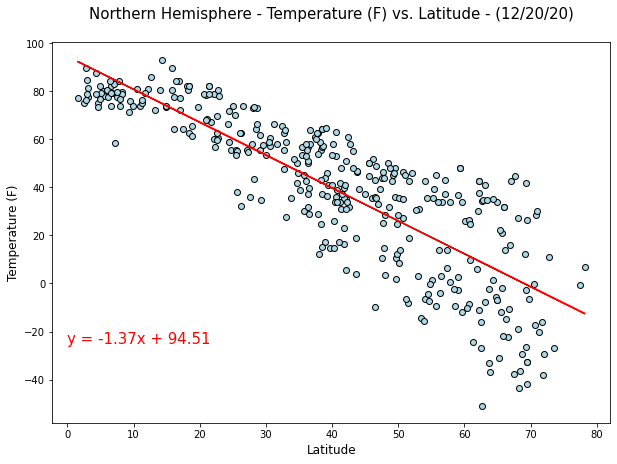

In [55]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,-25),fontsize=15,color="red")

plt.title(f'Northern Hemisphere - Temperature (F) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temperature (F)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvstempnorth')
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4927899690253633


<function matplotlib.pyplot.show>

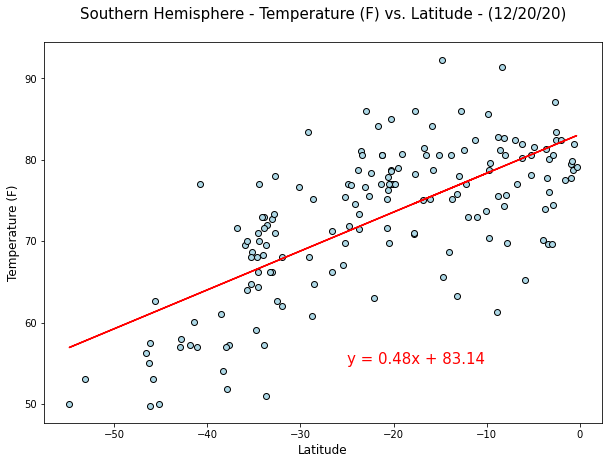

In [56]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-25,55),fontsize=15,color="red")

plt.title(f'Southern Hemisphere - Temperature (F) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Temperature (F)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvstempsouth')
plt.show

The above scatter plots show that the closer you get to the equator from either side, the temperature goes up.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08546461393613812


<function matplotlib.pyplot.show>

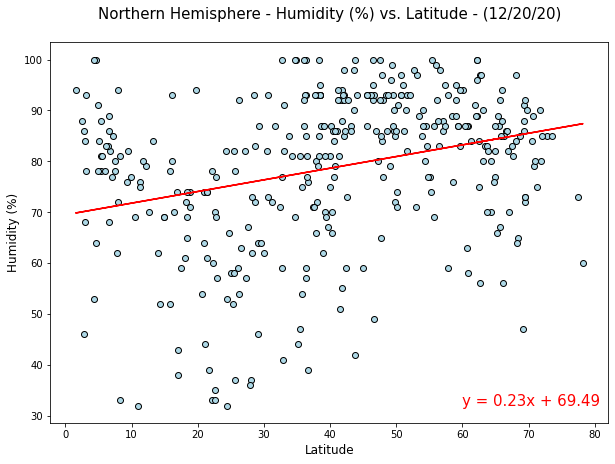

In [57]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(60,32),fontsize=15,color="red")

plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvshumidnorth')
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01933366401824395


<function matplotlib.pyplot.show>

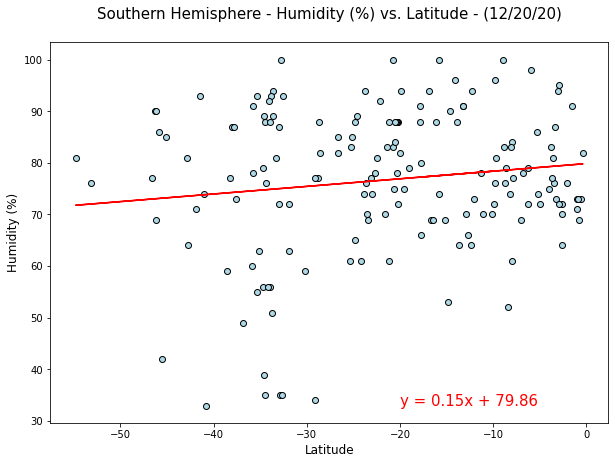

In [59]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20,33),fontsize=15,color="red")

plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvshumidsouth')
plt.show

Based on the above scatter plots, neither shows a reliable correlation between Humidity and Latitude position.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04391064101909872


<function matplotlib.pyplot.show>

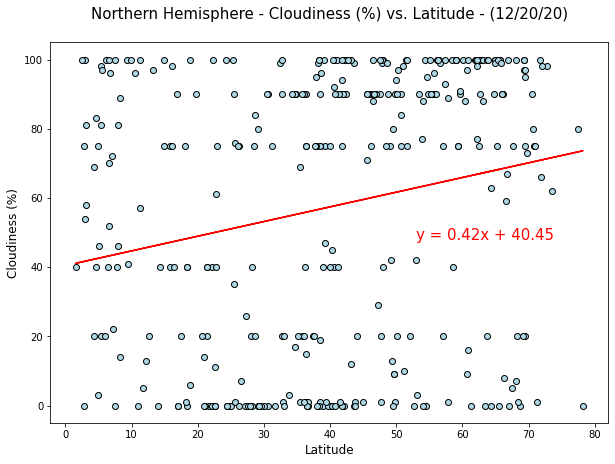

In [60]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(53,48),fontsize=15,color="red")

plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvscloudnorth')
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00674402811999338


<function matplotlib.pyplot.show>

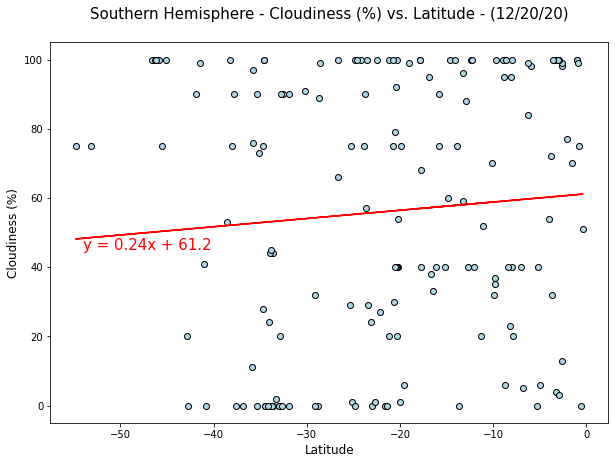

In [61]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-54,45),fontsize=15,color="red")

plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvscloudsouth')
plt.show

Again, based on these scatter plots, the linear regression as well as the r-value signify very little correlation between cloudiness and latitude position.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003975306064246184


<function matplotlib.pyplot.show>

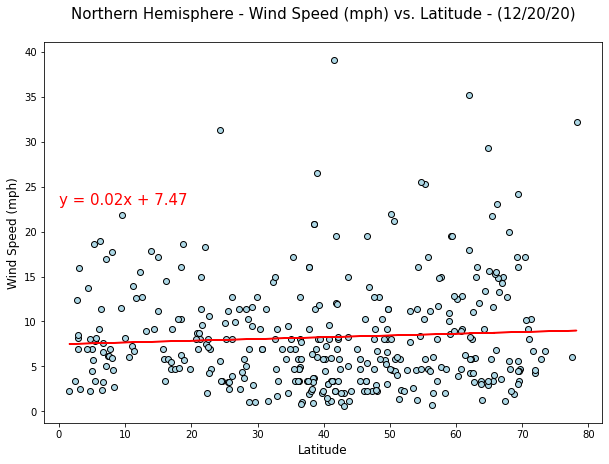

In [62]:
#Adding the linear regression equation and line to the scatter plot.
x_values = north_hemi_weather_df['Latitude']
y_values = north_hemi_weather_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,23),fontsize=15,color="red")

plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvswindnorth')
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04800278202765968


<function matplotlib.pyplot.show>

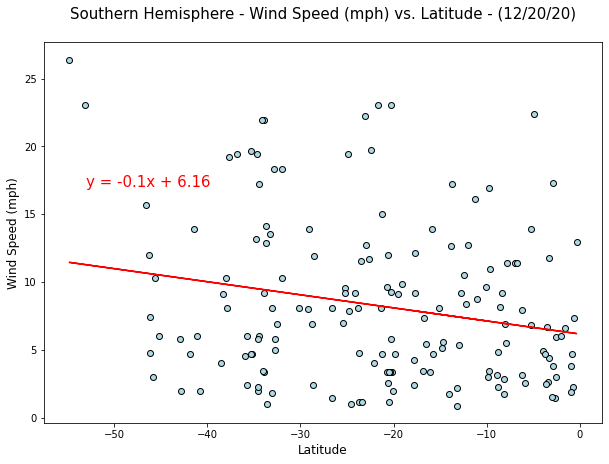

In [63]:
#Adding the linear regression equation and line to the scatter plot.
x_values = south_hemi_weather_df['Latitude']
y_values = south_hemi_weather_df['Wind']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values, color = 'lightblue', edgecolors = 'black')

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-53,17),fontsize=15,color="red")

plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude - ({date})\n', fontsize = 15)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)

print(f"The r-squared is: {rvalue**2}")
plt.savefig('images/linreglatvswindsouth')
plt.show

In this scatter plot comparision, while there is a slight trend downward in wind speed as you approach the equator.  However, this data is to sparatic to make a good correlation. 